<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Wine_Quality-Modelling</h1>


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading train and test set for modelling
train=pd.read_csv("train.csv")
test=pd.read_csv('test.csv')

In [3]:
#head of train
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [4]:
#head of test
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.27,0.26,11.8,0.053,55.0,173.0,0.99699,3.11,0.60,9.8
1,6.6,0.24,0.22,12.3,0.051,35.0,146.0,0.99676,3.10,0.67,9.4
2,7.4,0.27,0.26,11.8,0.053,55.0,173.0,0.99699,3.11,0.60,9.8
3,7.1,0.38,0.29,13.6,0.041,30.0,137.0,0.99461,3.02,0.96,12.1
4,6.8,0.43,0.26,5.2,0.043,40.0,176.0,0.99116,3.17,0.41,12.3


In [5]:
#splitting input and output
x=train.drop('quality',axis=1)
y=train['quality']

<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:120%;text-align:left">With feature Selection</h1>


In [6]:
#libraries for feature slection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [7]:
#first method
#selectk best
feature_selection=SelectKBest(score_func=f_classif,k='all')
fit=feature_selection.fit(x,y)
print(fit.scores_)

[ 33.67796894  19.98138348   7.67168908  63.08201959 156.97942296
   2.35346049 127.11175702 412.98517295  36.63781962   9.62798104
 833.01737289]


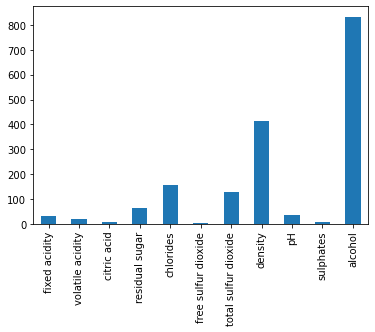

In [8]:
#visualization
fs1=pd.Series(fit.scores_,index=x.columns)
fs1.plot(kind='bar')
plt.show()

In [9]:
#second method
#using RFE(Recursive Feature Elimination)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model=LogisticRegression(solver='lbfgs',max_iter=200)
rfe=RFE(model,n_features_to_select=4)
fit=rfe.fit(x,y)

In [10]:
print("Num Features:",fit.n_features_)
print("Selected Features:%s"%fit.support_)
print("feature Ranking:%s"%fit.ranking_)

Num Features: 4
Selected Features:[False  True False False  True False False False  True  True False]
feature Ranking:[6 1 3 5 1 7 8 4 1 1 2]


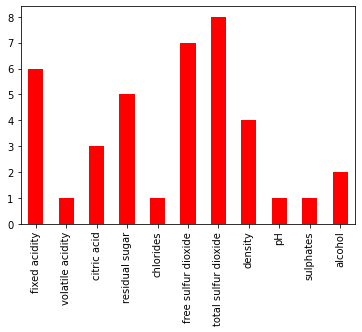

In [11]:
#visualization
fs1=pd.Series(fit.ranking_,index=x.columns)
fs1.plot(kind='bar',color='r')
plt.show()

>From feature selection removing some four variables for training

In [12]:
x_fs=train.drop(columns=['quality','volatile acidity','pH','chlorides','sulphates'],axis=1)
y_fs=train['quality']

In [13]:
y_fs.value_counts()

0    3422
1     976
Name: quality, dtype: int64

In [14]:
#using SMOTE
#used for blancing the output in equal manner
from imblearn.over_sampling import SMOTE
smote=SMOTE(k_neighbors=4)
x_fs,y_fs=smote.fit_resample(x_fs,y_fs)

In [15]:
y_fs.value_counts()

1    3422
0    3422
Name: quality, dtype: int64

In [16]:
#import all models libraries
#modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

models=[LogisticRegression(),RandomForestClassifier(n_estimators=20,random_state=0),DecisionTreeClassifier(random_state=43),
       KNeighborsClassifier(n_neighbors=3),ExtraTreesClassifier(),BernoulliNB(),GaussianNB(),MultinomialNB()]

In [17]:
from sklearn.model_selection import KFold,cross_val_score
def cv_score(model):
    kfold=KFold(n_splits=10,random_state=7,shuffle=True)
    cv_score=cross_val_score(model,x_fs,y_fs,cv=kfold,scoring='accuracy')
    print("model:",model)
    print("Accuracy:",cv_score.mean()*100)

In [18]:
print("Accuracy score With Feature Selection")
for model in models:
    cv_score(model)

Accuracy score With Feature Selection
model: LogisticRegression()
Accuracy: 73.27566483117769
model: RandomForestClassifier(n_estimators=20, random_state=0)
Accuracy: 90.23901908054809
model: DecisionTreeClassifier(random_state=43)
Accuracy: 86.30917317624963
model: KNeighborsClassifier(n_neighbors=3)
Accuracy: 86.98057796559526
model: ExtraTreesClassifier()
Accuracy: 91.75873991548211
model: BernoulliNB()
Accuracy: 49.56155290903658
model: GaussianNB()
Accuracy: 71.46352499252998
model: MultinomialNB()
Accuracy: 65.56089127929312


>When we modelling the train dataset with feature selection, the accuracy score of Random Forest Classifier has accuracy score of 90.23901908054809


<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:120%;text-align:left">Modelling without feature Selection</h1>


In [19]:
#using SMOTE
smote=SMOTE(k_neighbors=4)
x,y=smote.fit_resample(x,y)

In [20]:
y.value_counts()

1    3422
0    3422
Name: quality, dtype: int64

In [21]:
from sklearn.model_selection import KFold,cross_val_score
def cv_score(model):
    kfold=KFold(n_splits=10,random_state=7,shuffle=True)
    cv_score=cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
    print("model:",model)
    print("Accuracy:",cv_score.mean()*100)

In [22]:
print("Accuracy score Without Feature Selection")
for model in models:
    cv_score(model)

Accuracy score Without Feature Selection
model: LogisticRegression()
Accuracy: 72.04821359969266
model: RandomForestClassifier(n_estimators=20, random_state=0)
Accuracy: 90.96984248943528
model: DecisionTreeClassifier(random_state=43)
Accuracy: 86.01664745806123
model: KNeighborsClassifier(n_neighbors=3)
Accuracy: 86.38156827592096
model: ExtraTreesClassifier()
Accuracy: 92.28465018995176
model: BernoulliNB()
Accuracy: 49.56155290903658
model: GaussianNB()
Accuracy: 71.47829427583557
model: MultinomialNB()
Accuracy: 65.34148631920434


>Model without feature selection the accuracy rate of the model random forest Classifier is 90.96

>comparing with feature selection and without feature selection, 
>without feature selection has high accuracy score for the model random forest classifier

>Try to check the accuracy score of random forest classifier using train test split model

In [23]:
#Try to check the accuracy score of random forest classifier using train test split model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [24]:
rfc=RandomForestClassifier(n_estimators=20,random_state=0)
rfc.fit(x_train,y_train)
predict=rfc.predict(x_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
print("Accuracy",accuracy_score(y_test,predict))
print("Classification_report:",classification_report(y_test,predict))
print("Confusion_matrix:",confusion_matrix(y_test,predict))
print("F1_score:",f1_score(y_test,predict))

Accuracy 0.918918918918919
Classification_report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92       675
           1       0.92      0.92      0.92       694

    accuracy                           0.92      1369
   macro avg       0.92      0.92      0.92      1369
weighted avg       0.92      0.92      0.92      1369

Confusion_matrix: [[621  54]
 [ 57 637]]
F1_score: 0.9198555956678701


>Finally Random Forest Classifier without Feature Selection is used for training the dataset


<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:120%;text-align:left">Training & testing the Dataset</h1>


In [26]:
#training the dataset
#random forest clasifier model
rfc_model=RandomForestClassifier(n_estimators=20,random_state=0)
rfc_model.fit(x,y)

#predict the test dataset
predict=rfc_model.predict(test)

In [27]:
#display the predicted output
predict

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,